# Concrete Strength Prediction

### Goal:

To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

### Steps and Tasks:

#### Exploratory Data Quality Report Reflecting the Following:
1. Univariate analysis –data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails, missing values, outliers, duplicates(10 Marks).<br>

2. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves. (10 marks)<br>

3. Feature Engineering techniques(10 marks)<br>

    a. Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth<br>

    b. Get the data model ready and do a train test split.<br>

    c. Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.<br>


#### Creating the Model and Tuning It:
1. Algorithms that you think will be suitable for this project. Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there). (15 marks)<br>
2. Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)<br>


### Attribute Information:

Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.<br><br>

<table>
  <thead>
    <tr>
      <th>Name</th>
      <th>Data Type</th>
      <th>Measurement</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Cement (cement)</td>
      <td>quantitative</td>
      <td>kg in a m3 mixture</td>
      <td>Input Variable</td>
    </tr>
    <tr>
      <td>Blast Furnace Slag (slag)</td>
      <td>quantitative</td>
      <td>kg in a m3 mixture</td>
      <td>Input Variable</td>
    </tr>
    <tr>
      <td>Fly Ash (ash)</td>
      <td>quantitative</td>
      <td>kg in a m3 mixture</td>
      <td>Input Variable</td>
    </tr>
    <tr>
      <td>Water(water)</td>
      <td>quantitative</td>
      <td>kg in a m3 mixture</td>
      <td>Input Variable</td>
    </tr>
    <tr>
      <td>Superplasticizer (superplastic)</td>
      <td>quantitative</td>
      <td>kg in a m3 mixture</td>
      <td>Input Variable</td>
    </tr>
    <tr>
      <td>Coarse Aggregate (coarseagg)</td>
      <td>quantitative</td>
      <td>kg in a m3 mixture</td>
      <td>Input Variable</td>
    </tr>
    <tr>
      <td>Fine Aggregate (fineagg)</td>
      <td>quantitative</td>
      <td>kg in a m3 mixture</td>
      <td>Input Variable</td>
    </tr>
    <tr>
      <td>Age(age)</td>
      <td>quantitative</td>
      <td>Day (1~365)</td>
      <td>Input Variable</td>
    </tr>
    <tr>
      <td>Concrete compressive strength(strength)</td>
      <td>quantitative</td>
      <td>MPa</td>
      <td>Output Variable</td>
    </tr>
  </tbody>
</table>

# Import all necessary modules and load the data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

In [2]:
#Load data
df = pd.read_csv("concrete.csv")

In [3]:
df.shape # Check number of columns and rows in data frame

(1030, 9)

In [4]:
df.head(10) # To check first 10 rows of data set

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [5]:
# Check whether there are any null values in data set
df.isnull().values.any() 

False

##  Univariate Analysis

In [6]:
#Checking data types
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None


In [7]:
#Statistical summary
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


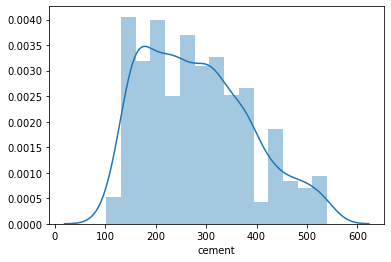

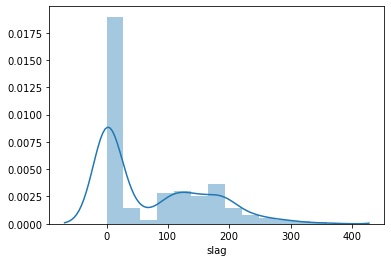

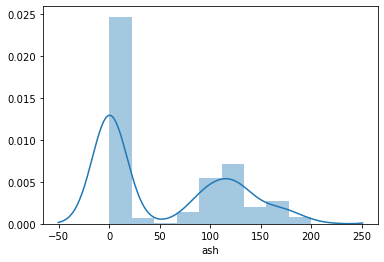

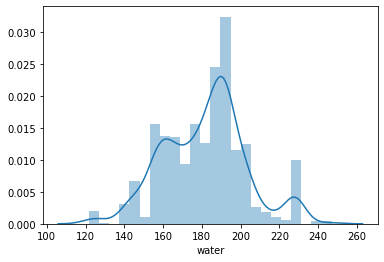

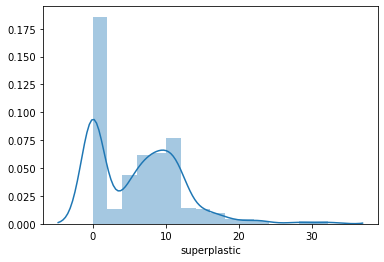

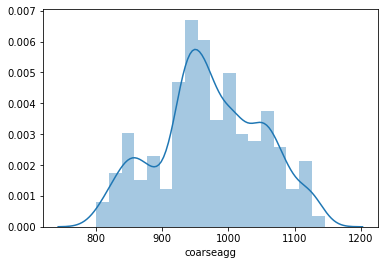

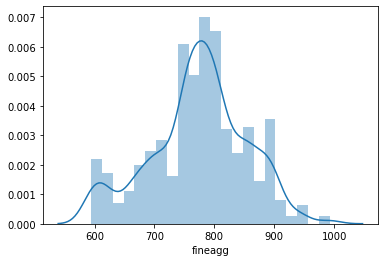

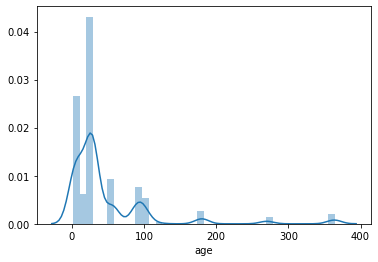

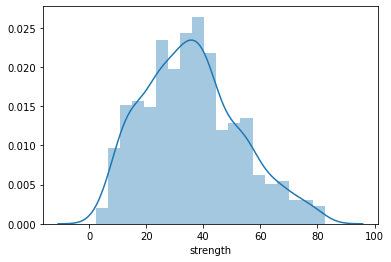

In [8]:
# distplot for continous columns
for i in ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','strength']:
    sns.distplot(df[i])
    plt.show()

## Bivariate

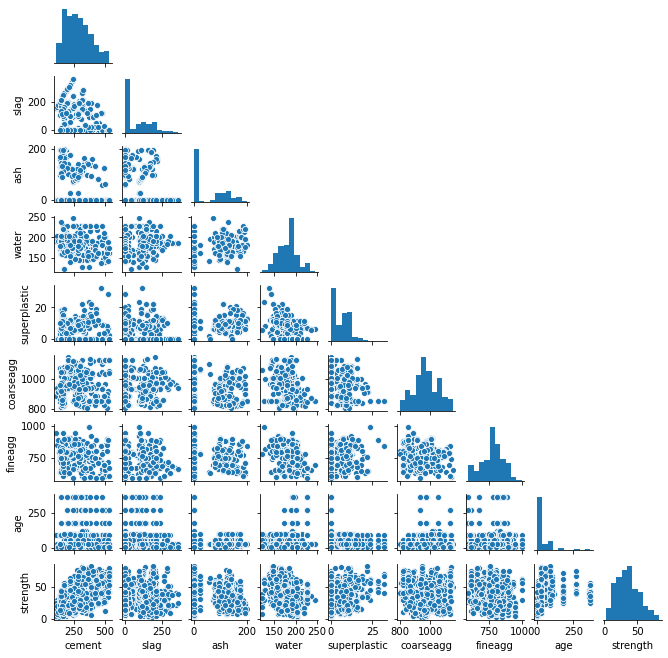

In [9]:
#Pairplot
sns.pairplot(df, height=1, diag_kind='auto', corner=True)
plt.show()

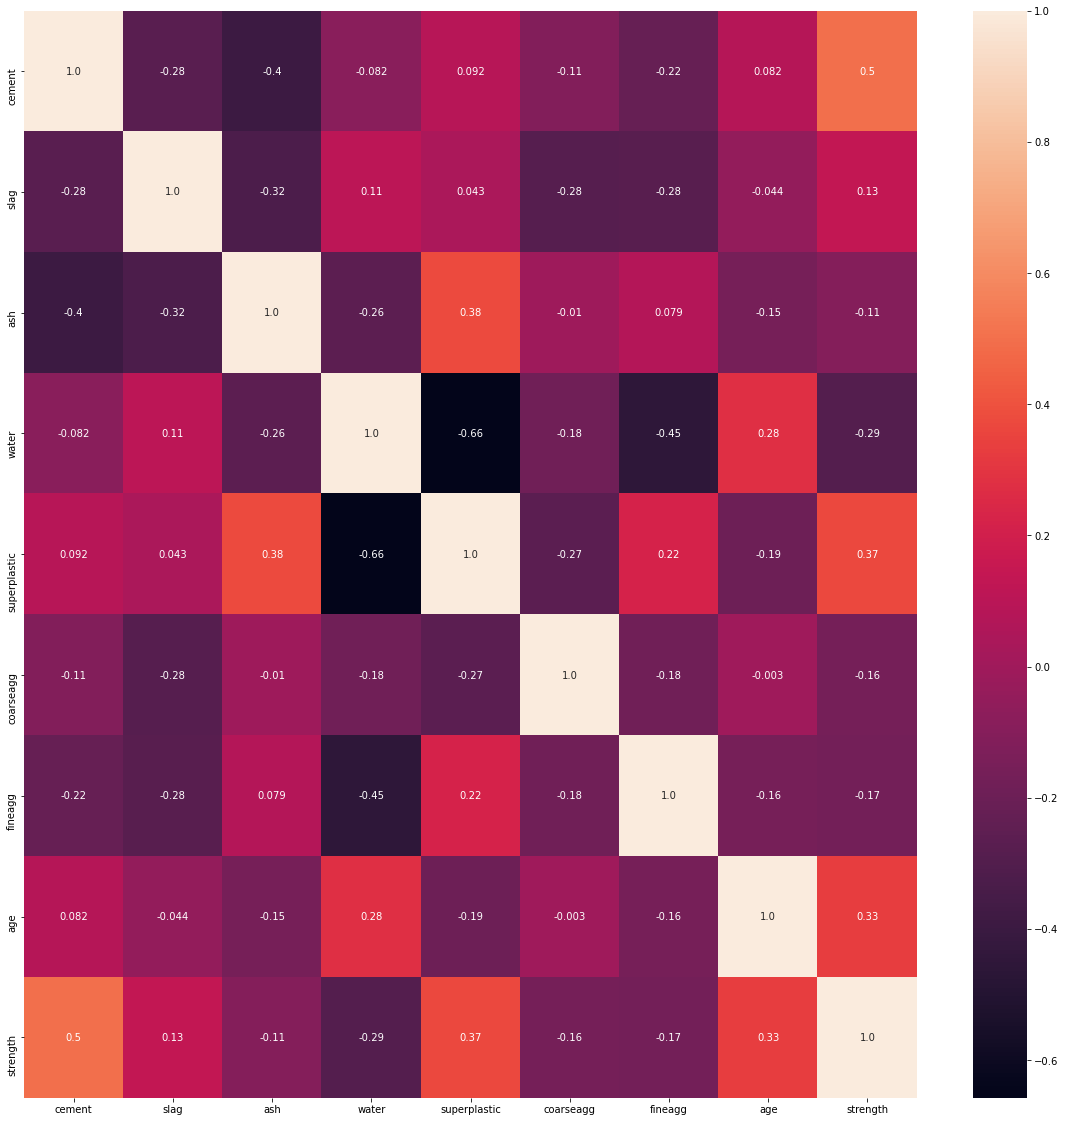

In [10]:
#Heatmap to visualize correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt=".2")
plt.show()

**Insights:**
- `No columns are highly correlated`
- Strength is moderately correlated (positive) to cement and to some extent superplastic, age and slag.
- Strength is slightly negatively correlated to ash, fineagg, coarseagg and water.

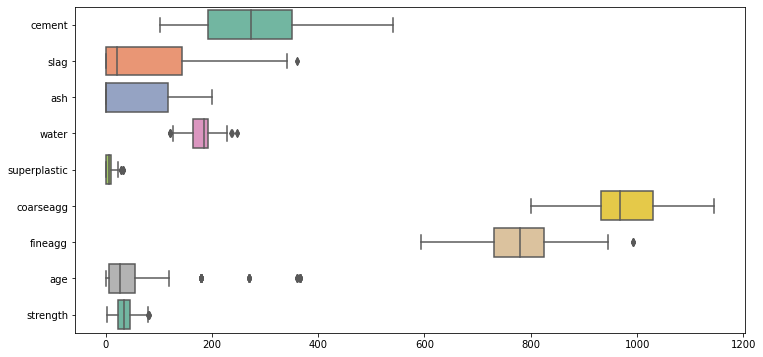

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, orient="h", palette="Set2", dodge=False)

**Insights:**
- The independent attributes have outliers
- The age attribute has a high amount of outliers
- The target attribute (strength) also has outliers
- The water attribute shows presence of outliers on both sides of the whiskers



In [12]:
# Checking the number of unique values in each column of the dataframe.
df.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## Split Data

In [14]:
## Define X and Y variables
X = df.drop("strength" , axis=1)
y = df.pop("strength")
print(X.shape)
print(y.shape)
print(df.info())

(1030, 8)
(1030,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 64.5 KB
None


In [15]:
#Split the dataset into train, test and validation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,StratifiedKFold, KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

n_split = 10
rnd_state = 7
kfold = KFold(n_split, random_state = rnd_state)

#### Standardization of variables

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_val = sc.transform(X_val)

#### Decision Tree Regressor

In [19]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

dtree_train_score = dtr.score(X_train, y_train)
dtree_test_score = dtr.score(X_test, y_test)
dtree_score = dtr.score(X_val, y_val)

dtree_rmse = np.sqrt((-1) * cross_val_score(dtr, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())

dtree_r2 = cross_val_score(dtr, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()

#Store the performance metrics for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Model': ['Decision Tree Regressor'],
                           'Training Score': [dtree_train_score],
                           'Validation Score': [dtree_score],
                           'Test Score': [dtree_test_score],          
                           'RMSE': [dtree_rmse],
                           'R Squared': [dtree_r2]})
resultsDf = resultsDf[['Model', 'Training Score', 'Validation Score', 'Test Score', 'RMSE', 'R Squared']]

resultsDf




,Model,Training Score,Validation Score,Test Score,RMSE,R Squared
0,Decision Tree Regressor,0.993866,0.763279,0.794496,6.988191,0.817834


#### AdaBoost Regressor

In [20]:
#AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor

abr = BaggingRegressor(n_estimators=100)

abr.fit(X_train, y_train)

y_pred_abr = abr.predict(X_test)


abr_train_score = abr.score(X_train, y_train)
abr_test_score = abr.score(X_test, y_test)

abr_score = abr.score(X_val, y_val)

abr_rmse = np.sqrt((-1) * cross_val_score(abr, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())

abr_r2 = cross_val_score(abr, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()


#Store the performance metrics for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model': 'AdaBoost Regressor',
                           'Training Score': [abr_train_score],
                           'Validation Score': [abr_score],
                           'Test Score': [abr_test_score],           
                           'RMSE': [abr_rmse],
                           'R Squared': [abr_r2]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model', 'Training Score', 'Validation Score', 'Test Score', 'RMSE', 'R Squared']]
resultsDf

,Model,Training Score,Validation Score,Test Score,RMSE,R Squared
0,Decision Tree Regressor,0.993866,0.763279,0.794496,6.988191,0.817834
0,AdaBoost Regressor,0.980029,0.869760,0.877780,5.591417,0.887064


#### Bagging Regressor

In [21]:
#Bagging Regressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor

bgr = BaggingRegressor(n_estimators=100)

bgr.fit(X_train, y_train)

y_pred_bgr = bgr.predict(X_test)


bgr_train_score = bgr.score(X_train, y_train)
bgr_test_score = bgr.score(X_test, y_test)

bgr_score = bgr.score(X_val, y_val)

bgr_rmse = np.sqrt((-1) * cross_val_score(bgr, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())

bgr_r2 = cross_val_score(bgr, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()

#Store the performance metrics for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model': 'Bagging Regressor',
                           'Training Score': [bgr_train_score],
                           'Validation Score': [bgr_score],
                           'Test Score': [bgr_test_score],           
                           'RMSE': [bgr_rmse],
                           'R Squared': [bgr_r2]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model', 'Training Score', 'Validation Score', 'Test Score', 'RMSE', 'R Squared']]
resultsDf

,Model,Training Score,Validation Score,Test Score,RMSE,R Squared
0,Decision Tree Regressor,0.993866,0.763279,0.794496,6.988191,0.817834
0,AdaBoost Regressor,0.980029,0.869760,0.877780,5.591417,0.887064
0,Bagging Regressor,0.980451,0.868400,0.879638,5.531453,0.887801


#### Gradient Boost Regressor

In [22]:
#Gradient Boost Regressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor

gbr = BaggingRegressor(n_estimators=100)

gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)


gbr_train_score = gbr.score(X_train, y_train)
gbr_test_score = gbr.score(X_test, y_test)

gbr_score = gbr.score(X_val, y_val)

gbr_rmse = np.sqrt((-1) * cross_val_score(gbr, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())

gbr_r2 = cross_val_score(gbr, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()

#Store the performance metrics for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model': 'Gradient Boost Regressor',
                           'Training Score': [gbr_train_score],
                           'Validation Score': [gbr_score],
                           'Test Score': [gbr_test_score],           
                           'RMSE': [gbr_rmse],
                           'R Squared': [gbr_r2]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model', 'Training Score', 'Validation Score', 'Test Score', 'RMSE', 'R Squared']]
resultsDf



,Model,Training Score,Validation Score,Test Score,RMSE,R Squared
0,Decision Tree Regressor,0.993866,0.763279,0.794496,6.988191,0.817834
0,AdaBoost Regressor,0.980029,0.869760,0.877780,5.591417,0.887064
0,Bagging Regressor,0.980451,0.868400,0.879638,5.531453,0.887801
0,Gradient Boost Regressor,0.980746,0.870537,0.881382,5.628545,0.884913


#### Random Forest Regressor

In [23]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)


rfr_train_score = rfr.score(X_train, y_train)
rfr_score = rfr.score(X_val, y_val)
rfr_rmse = np.sqrt((-1) * cross_val_score(rfr, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
rfr_r2 = cross_val_score(rfr, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()

rfr_test_score = rfr.score(X_test, y_test)

#Store the performance metrics for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model': 'Random Forest Regressor',
                           'Training Score': [rfr_train_score],
                           'Validation Score': [rfr_score],
                           'Test Score': [rfr_test_score],           
                           'RMSE': [rfr_rmse],
                           'R Squared': [rfr_r2]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model', 'Training Score', 'Validation Score', 'Test Score', 'RMSE', 'R Squared']]
resultsDf


,Model,Training Score,Validation Score,Test Score,RMSE,R Squared
0,Decision Tree Regressor,0.993866,0.763279,0.794496,6.988191,0.817834
0,AdaBoost Regressor,0.980029,0.869760,0.877780,5.591417,0.887064
0,Bagging Regressor,0.980451,0.868400,0.879638,5.531453,0.887801
0,Gradient Boost Regressor,0.980746,0.870537,0.881382,5.628545,0.884913
0,Random Forest Regressor,0.979414,0.865153,0.879520,5.581369,0.884527


In [24]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train.values.ravel())

rfr_train_score = rfr.score(X_train, y_train)
rfr_score = rfr.score(X_val, y_val)
rfr_rmse = np.sqrt((-1) * cross_val_score(rfr, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
rfr_r2 = cross_val_score(rfr, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()

rfr_test_score = rfr.score(X_test, y_test)

#Store the performance metrics for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model': 'Random Forest Regressor',
                           'Training Score': [rfr_train_score],
                           'Validation Score': [rfr_score],
                           'Test Score': [rfr_test_score],           
                           'RMSE': [rfr_rmse],
                           'R Squared': [rfr_r2]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model', 'Training Score', 'Validation Score', 'Test Score', 'RMSE', 'R Squared']]

y_pred_rfr = rfr.predict(X_test)

resultsDf


,Model,Training Score,Validation Score,Test Score,RMSE,R Squared
0,Decision Tree Regressor,0.993866,0.763279,0.794496,6.988191,0.817834
0,AdaBoost Regressor,0.980029,0.869760,0.877780,5.591417,0.887064
0,Bagging Regressor,0.980451,0.868400,0.879638,5.531453,0.887801
0,Gradient Boost Regressor,0.980746,0.870537,0.881382,5.628545,0.884913
0,Random Forest Regressor,0.979414,0.865153,0.879520,5.581369,0.884527
0,Random Forest Regressor,0.981112,0.866056,0.877494,5.548864,0.886564


## Hyper parameter tuning

#### Optimize the model parameters



Apply param grid to the list of hyper parameters of the algorithm(s)
Once hyper parameter grid is defined, import random search CV and fit x_train and y_train
Determine the best params and test score

### Random Forest

##### RandomSearchCV

In [25]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [26]:
# Create the paramaters grid
params_grid = {'bootstrap': [True, False],
               'max_depth': [5, 10, None],
               'max_features': ['auto', 'log2'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [10, 55, 100]}

In [27]:
params_grid2 = {
    'bootstrap': [True,False],
    'max_depth': [4,5,3],
    'max_features': ['sqrt','log2',0.5],
    'min_samples_leaf': [1,3],
    'min_samples_split': [2,3],
    'n_estimators': [25,50,100]
} 

In [28]:
from sklearn.model_selection import RandomizedSearchCV
rf_randomCV = RandomizedSearchCV(estimator=rfr, param_distributions=params_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = kfold, verbose=2, random_state=7, n_jobs=-1,
                              return_train_score=True)
# Fit the random search model
rf_randomCV.fit(X_train, y_train.values.ravel());

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished


In [29]:
#Model with the optimized hyper parameters
rfTree = rf_randomCV.best_estimator_
rfTree.fit(X_train, y_train.values.ravel())
rfTree_train_score = rfTree.score(X_train, y_train)
rfTree_score = rfTree.score(X_val, y_val)
rfTree_rmse = np.sqrt((-1) * cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())

rfTree_r2 = cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()

rfTree_test_score = rfTree.score(X_test, y_test)

#Store the performance metrics for each model in a dataframe for final comparison
resultsDfHP = pd.DataFrame({'Model': 'Random Forest Regressor - RSCV',
                           'Training Score': [rfTree_train_score],
                           'Validation Score': [rfTree_score],
                           'Test Score': [rfTree_test_score],                                       
                           'RMSE': [rfTree_rmse],
                           'R Squared': [rfTree_r2]})
resultsDfHP = resultsDfHP[['Model', 'Training Score', 'Validation Score', 'Test Score', 'RMSE', 'R Squared']]

resultsDfHP


,Model,Training Score,Validation Score,Test Score,RMSE,R Squared
0,Random Forest Regressor - RSCV,0.930799,0.821854,0.838834,6.577892,0.838418


##### GridSearchCV

#### Optimize the model parameters

Apply param grid to the list of hyper parameters of the algorithm(s)
Once hyper parameter grid is defined, import grid search CV and fit x_train and y_train
Determine the best params and test score

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [10],
    'max_features': ['log2'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [5,10],
    'n_estimators': np.arange(50, 71)
}
rfg = RandomForestRegressor(random_state = 7)

grid_search = GridSearchCV(estimator = rfg, param_grid = param_grid, 
                          cv = kfold, n_jobs = 1, verbose = 0, return_train_score=True)

grid_search.fit(X_train, y_train.values.ravel());
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 62}

In [31]:
# best ensemble model (with optimal combination of hyperparameters)
rfTree = grid_search.best_estimator_
rfTree.fit(X_train, y_train.values.ravel())
rfTree_train_score = rfTree.score(X_train, y_train)
rfTree_score = rfTree.score(X_val, y_val)
rfTree_rmse = np.sqrt((-1) * cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())

rfTree_r2 = cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()

rfTree_test_score = rfTree.score(X_test, y_test)

#Store the performance metrics for each model in a dataframe for final comparison
tempResultsDfHP = pd.DataFrame({'Model': 'Random Forest Regressor - GSCV',
                           'Training Score': [rfTree_train_score],
                           'Validation Score': [rfTree_score],
                           'Test Score': [rfTree_test_score],                                        
                           'RMSE': [rfTree_rmse],
                           'R Squared': [rfTree_r2]})
resultsDfHP = pd.concat([resultsDfHP, tempResultsDfHP])
resultsDfHP = resultsDfHP[['Model', 'Training Score', 'Validation Score', 'Test Score', 'RMSE', 'R Squared']]

resultsDfHP

,Model,Training Score,Validation Score,Test Score,RMSE,R Squared
0,Random Forest Regressor - RSCV,0.930799,0.821854,0.838834,6.577892,0.838418
0,Random Forest Regressor - GSCV,0.959913,0.852833,0.863007,6.080145,0.864795


### Bagging Regressor 

#### Optimize the model parameters



Apply param grid to the list of hyper parameters of the algorithm(s)
Once hyper parameter grid is defined, import random search CV and fit x_train and y_train
Determine the best params and test score

##### RandomSearchCV

In [32]:
#Get current parameters
bgr.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
# Create the paramaters grid
bgr_params_grid = {'bootstrap': [True, False],
               'max_features': [1.0],
               'n_estimators': [100]}

In [34]:
bgr_randomCV = RandomizedSearchCV(estimator=bgr, param_distributions=bgr_params_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = kfold, verbose=2, random_state=7, n_jobs=-1,
                              return_train_score=True)
# Fit the random search model
bgr_randomCV.fit(X_train, y_train.values.ravel());

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    2.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.5s finished


In [35]:
#Model with the optimized hyper parameters
bgr = bgr_randomCV.best_estimator_

bgr.fit(X_train, y_train)

y_pred_bgr = bgr.predict(X_test)


bgr_train_score = bgr.score(X_train, y_train)
bgr_test_score = bgr.score(X_test, y_test)

bgr_score = bgr.score(X_val, y_val)

bgr_rmse = np.sqrt((-1) * cross_val_score(bgr, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())

bgr_r2 = cross_val_score(bgr, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()

#Store the performance metrics for each model in a dataframe for final comparison
tempResultsDfHP = pd.DataFrame({'Model': 'Bagging Regressor - RSCV',
                           'Training Score': [bgr_train_score],
                           'Validation Score': [bgr_score],
                           'Test Score': [bgr_test_score],           
                           'RMSE': [bgr_rmse],
                           'R Squared': [bgr_r2]})
resultsDfHP = pd.concat([resultsDfHP, tempResultsDfHP])
resultsDfHP = resultsDfHP[['Model', 'Training Score', 'Validation Score', 'Test Score', 'RMSE', 'R Squared']]
resultsDfHP

,Model,Training Score,Validation Score,Test Score,RMSE,R Squared
0,Random Forest Regressor - RSCV,0.930799,0.821854,0.838834,6.577892,0.838418
0,Random Forest Regressor - GSCV,0.959913,0.852833,0.863007,6.080145,0.864795
0,Bagging Regressor - RSCV,0.980611,0.869530,0.878134,5.516107,0.886529


##### GridSearchCV

#### Optimize the model parameters

Apply param grid to the list of hyper parameters of the algorithm(s)
Once hyper parameter grid is defined, import grid search CV and fit x_train and y_train
Determine the best params and test score

In [36]:
bgr_param_grid = {'bootstrap': [True, False],
               'max_features': [1.0],
               'n_estimators': [100]}
bgr = BaggingRegressor(n_estimators=100)

grid_search_bgr = GridSearchCV(estimator = bgr, param_grid = bgr_param_grid, 
                          cv = kfold, n_jobs = 1, verbose = 0, return_train_score=True)

grid_search_bgr.fit(X_train, y_train.values.ravel());
grid_search_bgr.best_params_

{'bootstrap': True, 'max_features': 1.0, 'n_estimators': 100}

In [37]:
bgr = grid_search_bgr.best_estimator_

bgr.fit(X_train, y_train)

y_pred_bgr = bgr.predict(X_test)


bgr_train_score = bgr.score(X_train, y_train)
bgr_test_score = bgr.score(X_test, y_test)

bgr_score = bgr.score(X_val, y_val)

bgr_rmse = np.sqrt((-1) * cross_val_score(bgr, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())

bgr_r2 = cross_val_score(bgr, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()

#Store the performance metrics for each model in a dataframe for final comparison
tempResultsDfHP = pd.DataFrame({'Model': 'Bagging Regressor - GSCV',
                           'Training Score': [bgr_train_score],
                           'Validation Score': [bgr_score],
                           'Test Score': [bgr_test_score],           
                           'RMSE': [bgr_rmse],
                           'R Squared': [bgr_r2]})
resultsDfHP = pd.concat([resultsDfHP, tempResultsDfHP])
resultsDfHP = resultsDfHP[['Model', 'Training Score', 'Validation Score', 'Test Score', 'RMSE', 'R Squared']]
resultsDfHP

,Model,Training Score,Validation Score,Test Score,RMSE,R Squared
0,Random Forest Regressor - RSCV,0.930799,0.821854,0.838834,6.577892,0.838418
0,Random Forest Regressor - GSCV,0.959913,0.852833,0.863007,6.080145,0.864795
0,Bagging Regressor - RSCV,0.980611,0.869530,0.878134,5.516107,0.886529
0,Bagging Regressor - GSCV,0.980312,0.866009,0.879293,5.558539,0.885615


### Gradient Boost Regressor 

#### Optimize the model parameters



Apply param grid to the list of hyper parameters of the algorithm(s)
Once hyper parameter grid is defined, import random search CV and fit x_train and y_train
Determine the best params and test score

##### RandomSearchCV

In [40]:
#Get current parameters
gbr.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [41]:
# Create the paramaters grid
gbr_params_grid = {'bootstrap': [True, False],
               'max_features': [1.0],
               'n_estimators': [100],
               'random_state': [7],
               'warm_start': [True, False]}                  

In [43]:
gbr_randomCV = RandomizedSearchCV(estimator=gbr, param_distributions=gbr_params_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = kfold, verbose=2, random_state=7, n_jobs=-1,
                              return_train_score=True)
# Fit the random search model
gbr_randomCV.fit(X_train, y_train.values.ravel());

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.2s finished


In [ ]:
#Model with the optimized hyper parameters
gbr = gbr_randomCV.best_estimator_

gbr.fit(X_train, y_train)

y_pred_bgr = gbr.predict(X_test)


gbr_train_score = gbr.score(X_train, y_train)
gbr_test_score = gbr.score(X_test, y_test)

gbr_score = gbr.score(X_val, y_val)

gbr_rmse = np.sqrt((-1) * cross_val_score(gbr, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())

gbr_r2 = cross_val_score(gbr, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()

#Store the performance metrics for each model in a dataframe for final comparison
tempResultsDfHP = pd.DataFrame({'Model': 'Gradient Boost Regressor - RSCV',
                           'Training Score': [gbr_train_score],
                           'Validation Score': [gbr_score],
                           'Test Score': [gbr_test_score],           
                           'RMSE': [gbr_rmse],
                           'R Squared': [gbr_r2]})
resultsDfHP = pd.concat([resultsDfHP, tempResultsDfHP])
resultsDfHP = resultsDfHP[['Model', 'Training Score', 'Validation Score', 'Test Score', 'RMSE', 'R Squared']]
resultsDfHP

In [44]:
#Model with the optimized hyper parameters
gbr2 = gbr_randomCV.best_estimator_

gbr2.fit(X_train, y_train)

y_pred_gbr = gbr2.predict(X_test)


gbr2_train_score = gbr2.score(X_train, y_train)
gbr2_test_score = gbr2.score(X_test, y_test)

gbr2_score = gbr2.score(X_val, y_val)

gbr2_rmse = np.sqrt((-1) * cross_val_score(gbr2, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())

gbr2_r2 = cross_val_score(gbr2, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()

#Store the performance metrics for each model in a dataframe for final comparison
tempResultsDfHP = pd.DataFrame({'Model': 'Gradient Boost Regressor - RSCV',
                           'Training Score': [gbr2_train_score],
                           'Validation Score': [gbr2_score],
                           'Test Score': [gbr2_test_score],           
                           'RMSE': [gbr2_rmse],
                           'R Squared': [gbr2_r2]})
resultsDfHP = pd.concat([resultsDfHP, tempResultsDfHP])
resultsDfHP = resultsDfHP[['Model', 'Training Score', 'Validation Score', 'Test Score', 'RMSE', 'R Squared']]
resultsDfHP


,Model,Training Score,Validation Score,Test Score,RMSE,R Squared
0,Random Forest Regressor - RSCV,0.930799,0.821854,0.838834,6.577892,0.838418
0,Random Forest Regressor - GSCV,0.959913,0.852833,0.863007,6.080145,0.864795
0,Bagging Regressor - RSCV,0.980611,0.869530,0.878134,5.516107,0.886529
0,Bagging Regressor - GSCV,0.980312,0.866009,0.879293,5.558539,0.885615
0,Gradient Boost Regressor - RSCV,0.980099,0.870951,0.881009,5.545982,0.888365


##### GridSearchCV

#### Optimize the model parameters

Apply param grid to the list of hyper parameters of the algorithm(s)
Once hyper parameter grid is defined, import grid search CV and fit x_train and y_train
Determine the best params and test score

In [45]:
gbr_param_grid = {'bootstrap': [True, False],
               'max_features': [1.0],
               'n_estimators': [100],
               'random_state': [7],
               'warm_start': [True, False]} 

grid_search_gbr = GridSearchCV(estimator = gbr, param_grid = gbr_param_grid, 
                          cv = kfold, n_jobs = 1, verbose = 0, return_train_score=True)

grid_search_gbr.fit(X_train, y_train.values.ravel());
grid_search_gbr.best_params_

{'bootstrap': True,
 'max_features': 1.0,
 'n_estimators': 100,
 'random_state': 7,
 'warm_start': True}

In [46]:
#Model with the optimized hyper parameters
gbr3 = grid_search_gbr.best_estimator_

gbr3.fit(X_train, y_train)

y_pred_gbr3 = gbr3.predict(X_test)


gbr3_train_score = gbr3.score(X_train, y_train)
gbr3_test_score = gbr3.score(X_test, y_test)

gbr3_score = gbr3.score(X_val, y_val)

gbr3_rmse = np.sqrt((-1) * cross_val_score(gbr3, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())

gbr3_r2 = cross_val_score(gbr3, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()

#Store the performance metrics for each model in a dataframe for final comparison
tempResultsDfHP = pd.DataFrame({'Model': 'Gradient Boost Regressor - GSCV',
                           'Training Score': [gbr3_train_score],
                           'Validation Score': [gbr3_score],
                           'Test Score': [gbr3_test_score],           
                           'RMSE': [gbr3_rmse],
                           'R Squared': [gbr3_r2]})
resultsDfHP = pd.concat([resultsDfHP, tempResultsDfHP])
resultsDfHP = resultsDfHP[['Model', 'Training Score', 'Validation Score', 'Test Score', 'RMSE', 'R Squared']]
resultsDfHP

,Model,Training Score,Validation Score,Test Score,RMSE,R Squared
0,Random Forest Regressor - RSCV,0.930799,0.821854,0.838834,6.577892,0.838418
0,Random Forest Regressor - GSCV,0.959913,0.852833,0.863007,6.080145,0.864795
0,Bagging Regressor - RSCV,0.980611,0.869530,0.878134,5.516107,0.886529
0,Bagging Regressor - GSCV,0.980312,0.866009,0.879293,5.558539,0.885615
0,Gradient Boost Regressor - RSCV,0.980099,0.870951,0.881009,5.545982,0.888365
0,Gradient Boost Regressor - GSCV,0.980099,0.870951,0.881009,5.545982,0.888365


#### Conclusion

The optimized randomized search Gradient Boost Regressor has the highest test score and would be the recommended model for predicting concrete strength. 